        Date  Oil
0  01-Sep-07  NaN
1  02-Sep-07  NaN
2  03-Sep-07  NaN
3  04-Sep-07  NaN
4  05-Sep-07  NaN


C:\Users\pande\AppData\Local\Temp\ipykernel_20564\674303847.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


          ds   y
0 2007-09-01 NaN
1 2007-09-02 NaN
2 2007-09-03 NaN
3 2007-09-04 NaN
4 2007-09-05 NaN


13:46:45 - cmdstanpy - INFO - Chain [1] start processing
13:46:46 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
0    2008-02-12  2300.125082  1263.614728  3336.127684
1    2008-02-13  2329.282545  1265.599739  3364.625731
2    2008-02-14  2366.182057  1232.807850  3485.803263
3    2008-02-15  2344.792776  1280.363909  3409.891973
4    2008-02-16  2297.878786  1231.364338  3335.233243
...         ...          ...          ...          ...
3155 2016-12-26  1913.913770 -2052.824233  5710.707225
3156 2016-12-27  1952.593170 -2013.090014  5720.301415
3157 2016-12-28  1963.605379 -1952.469225  5857.281241
3158 2016-12-29  1983.155543 -1903.910044  5950.119179
3159 2016-12-30  1958.780262 -2015.755693  5862.472964

[3160 rows x 4 columns]


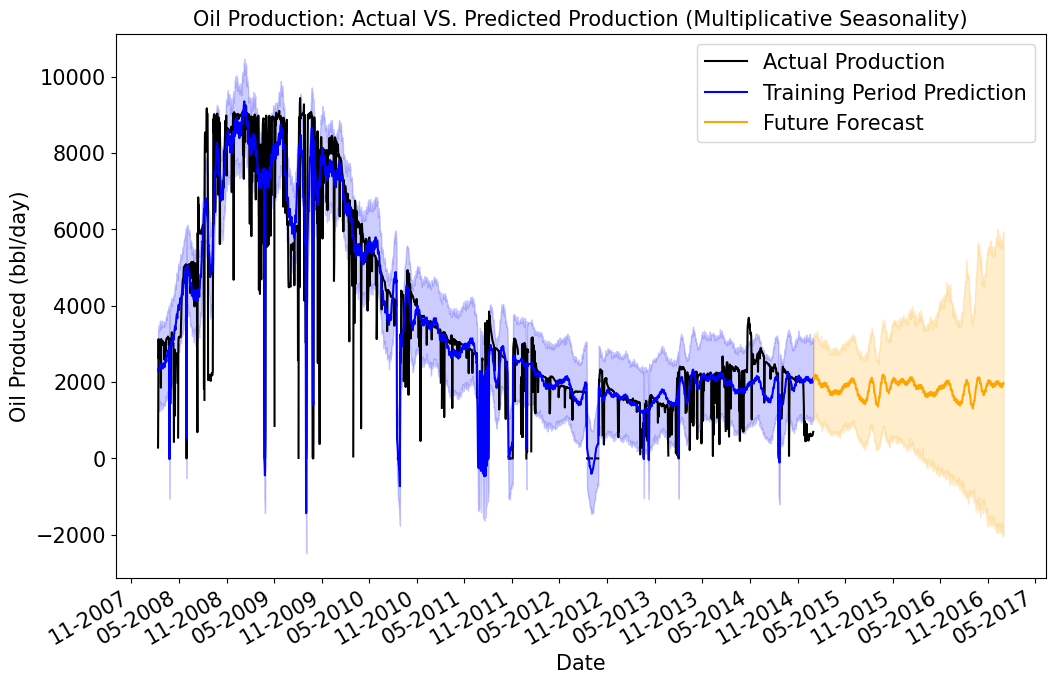

In [54]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
excel_path = 'Volve prophet 3.csv'
df = pd.read_csv(excel_path)

# Display the first few rows of the dataframe
print(df.head())

# Rename columns to match Prophet's expectations
df.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Display the first few rows to verify the changes
print(df.head())

# Identify the holidays (dates with 0 oil production)
holidays = df[df['y'] == 0][['ds']].copy()
holidays['holiday'] = 'zero_oil_production'

# Initialize and fit the model using all available data
model = Prophet(holidays=holidays, seasonality_mode='multiplicative', changepoint_prior_scale=0.2, interval_width=0.75)
model.fit(df)

# Prepare future dates for prediction (next 2 years)
future = model.make_future_dataframe(periods=2*365)

# Make predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save forecast to CSV
forecast.to_csv('forecast.csv', index=False)

# Split the forecast into training period predictions and future forecasts
train_pred = forecast[forecast['ds'] <= df['ds'].max()]
future_forecast = forecast[forecast['ds'] > df['ds'].max()]

# Define colors and title suffix
prediction_color = 'blue'
forecast_color = 'orange'
title_suffix = '(Multiplicative Seasonality)'

# Plot Actual vs Predicted production with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['ds'], df['y'], '-', label='Actual Production', color='black')  # Continuous line for actual production
plt.plot(train_pred['ds'], train_pred['yhat'], '-', label='Training Period Prediction', color=prediction_color)
plt.fill_between(train_pred['ds'], train_pred['yhat_lower'], train_pred['yhat_upper'], color=prediction_color, alpha=0.2)
plt.plot(future_forecast['ds'], future_forecast['yhat'], '-', label='Future Forecast', color=forecast_color)
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color=forecast_color, alpha=0.2)

# Format x-axis to display dates in 'mm-yyyy' format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'Oil Production: Actual VS. Predicted Production {title_suffix}', fontsize=15)
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data
csv_file_path = '/mnt/data/Norne field.csv'
norne_data = pd.read_csv(csv_file_path)

# Convert the 'Date and time' column to datetime format
norne_data['Date and time'] = pd.to_datetime(norne_data['Date and time'])

# Function to plot time series data
def plot_time_series(df, x_col, y_col, title, xlabel='Date and time', ylabel='Value'):
    plt.figure(figsize=(12, 6))
    plt.plot(df[x_col], df[y_col], label=y_col)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot scatter data
def plot_scatter(df, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Function to plot cumulative data
def plot_cumulative(df, x_col, y_col, title, xlabel='Cumulative Injection', ylabel='Cumulative Production'):
    df['Cumulative_' + x_col] = df[x_col].cumsum()
    df['Cumulative_' + y_col] = df[y_col].cumsum()
    plot_scatter(df, 'Cumulative_' + x_col, 'Cumulative_' + y_col, title, xlabel, ylabel)

# Plotting all time series data
def plot_all_time_series(df):
    # Time Series Plots
    plot_time_series(df, 'Date and time', 'FGIR', 'Gas Injection Rate (FGIR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FGPR', 'Gas Production Rate (FGPR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FLPR', 'Liquid Production Rate (FLPR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FOPR', 'Oil Production Rate (FOPR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FWIR', 'Water Injection Rate (FWIR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FWPR', 'Water Production Rate (FWPR) vs. Date and time')

    # Production and Injection Totals over time
    plot_time_series(df, 'Date and time', 'FGIT', 'Gas Injection Total (FGIT) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FGPT', 'Gas Production Total (FGPT) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FLPT', 'Liquid Production Total (FLPT) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FOPT', 'Oil Production Total (FOPT) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FWIT', 'Water Injection Total (FWIT) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FWPT', 'Water Production Total (FWPT) vs. Date and time')

    # In-Place Volumes over time
    plot_time_series(df, 'Date and time', 'FGIP', 'Gas in Place (FGIP) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FOIP', 'Oil in Place (FOIP) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FWIP', 'Water in Place (FWIP) vs. Date and time')

    # Pressure and Ratios over time
    plot_time_series(df, 'Date and time', 'FPR', 'Pressure average value (FPR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FGOR', 'Gas-Oil Ratio (FGOR) vs. Date and time')
    plot_time_series(df, 'Date and time', 'FWCT', 'Water Cut (FWCT) vs. Date and time')

# Plotting all scatter plots
def plot_all_scatter(df):
    plot_scatter(df, 'FGPR', 'FGIR', 'Gas Production Rate vs. Gas Injection Rate', 'Gas Injection Rate (FGIR)', 'Gas Production Rate (FGPR)')
    plot_scatter(df, 'FOPR', 'FPR', 'Oil Production Rate vs. Pressure average value', 'Pressure average value (FPR)', 'Oil Production Rate (FOPR)')
    plot_scatter(df, 'FWPR', 'FWIR', 'Water Production Rate vs. Water Injection Rate', 'Water Injection Rate (FWIR)', 'Water Production Rate (FWPR)')
    plot_scatter(df, 'FGPT', 'FOPT', 'Gas Production Total vs. Oil Production Total', 'Oil Production Total (FOPT)', 'Gas Production Total (FGPT)')
    plot_scatter(df, 'FWCT', 'FOPR', 'Water Cut vs. Oil Production Rate', 'Oil Production Rate (FOPR)', 'Water Cut (FWCT)')

# Plotting all cumulative data
def plot_all_cumulative(df):
    plot_cumulative(df, 'FGIR', 'FGPR', 'Cumulative Gas Production vs. Cumulative Gas Injection')
    plot_cumulative(df, 'FOPT', 'FWIR', 'Cumulative Oil Production vs. Cumulative Water Injection')
    plot_cumulative(df, 'FWPR', 'FWIR', 'Cumulative Water Production vs. Cumulative Water Injection')

# Plotting production performance
def plot_all_performance(df):
    plot_scatter(df, 'FGIP', 'FGPR', 'Gas Production Rate vs. Gas in Place', 'Gas in Place (FGIP)', 'Gas Production Rate (FGPR)')
    plot_scatter(df, 'FOIP', 'FOPR', 'Oil Production Rate vs. Oil in Place', 'Oil in Place (FOIP)', 'Oil Production Rate (FOPR)')
    plot_scatter(df, 'FWIP', 'FWPR', 'Water Production Rate vs. Water in Place', 'Water in Place (FWIP)', 'Water Production Rate (FWPR)')

# Plotting efficiency analysis
def plot_all_efficiency(df):
    plot_scatter(df, 'FWCT', 'FOPR', 'Oil Production Rate vs. Water Cut', 'Water Cut (FWCT)', 'Oil Production Rate (FOPR)')
    plot_scatter(df, 'FGOR', 'FOPR', 'Oil Production Rate vs. Gas-Oil Ratio', 'Gas-Oil Ratio (FGOR)', 'Oil Production Rate (FOPR)')

# Generate all plots for Norne data
plot_all_time_series(norne_data)
plot_all_scatter(norne_data)
plot_all_cumulative(norne_data)
plot_all_performance(norne_data)
plot_all_efficiency(norne_data)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Norne field.csv'

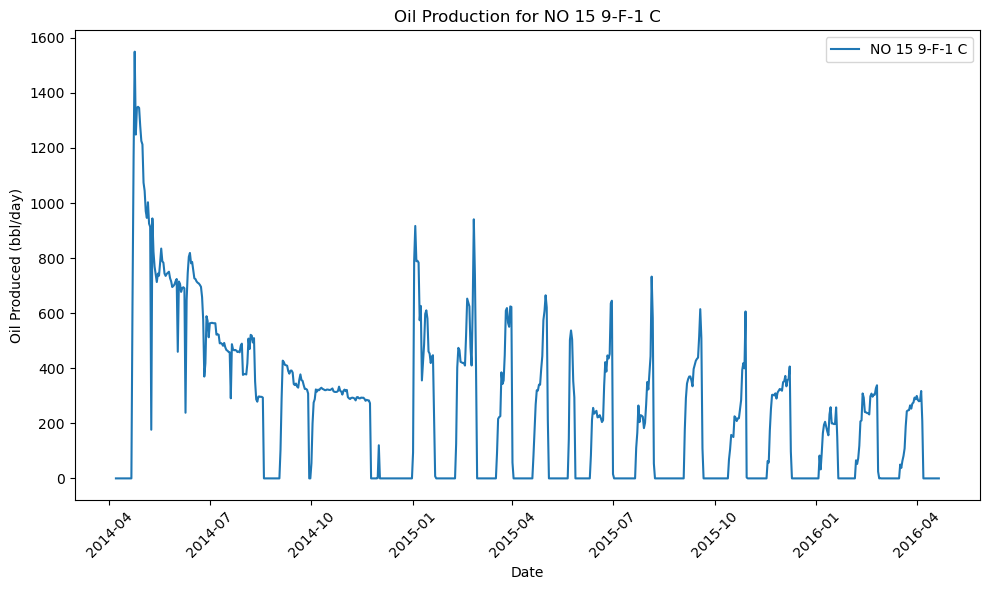

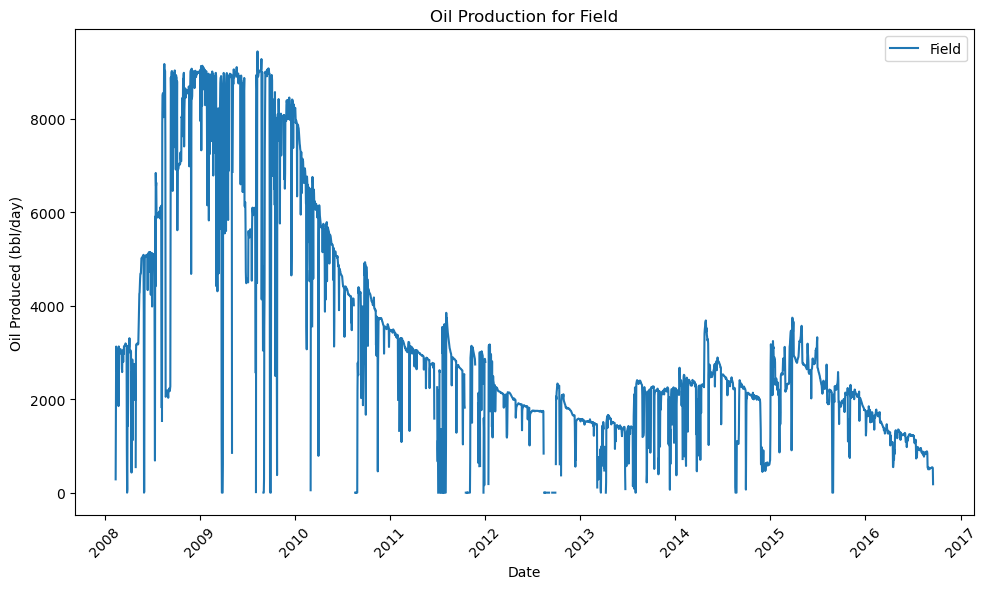

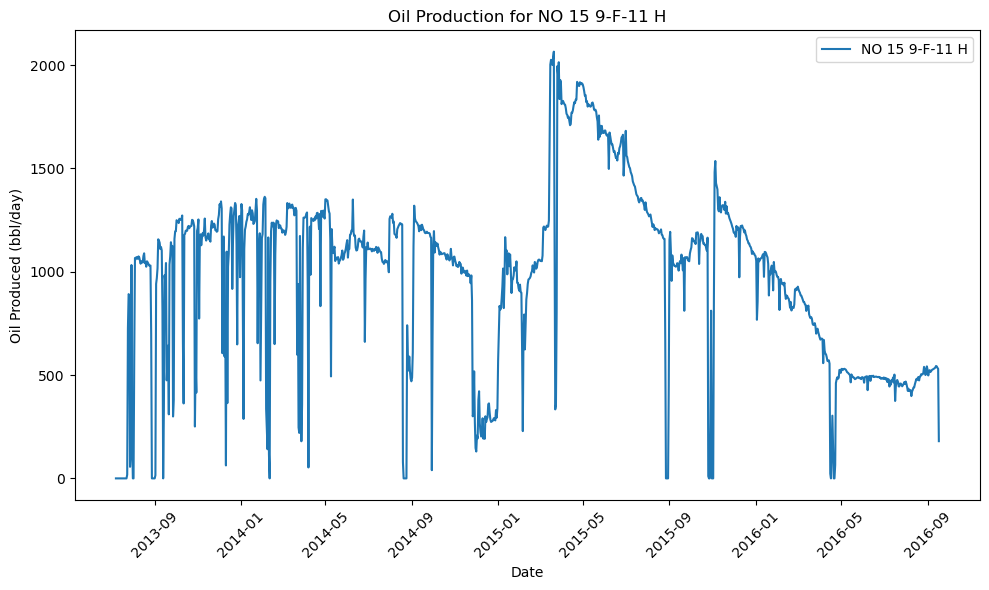

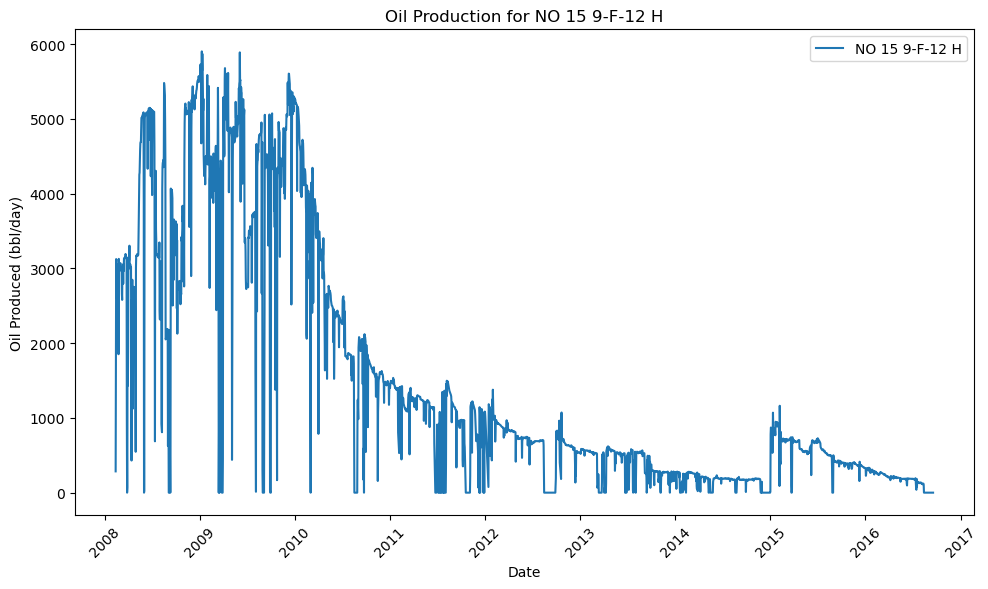

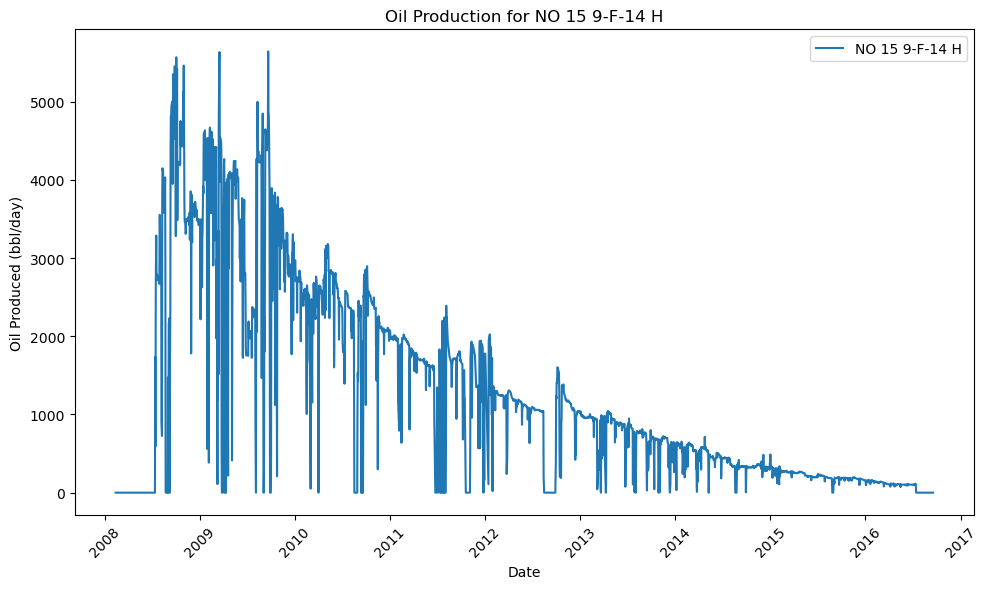

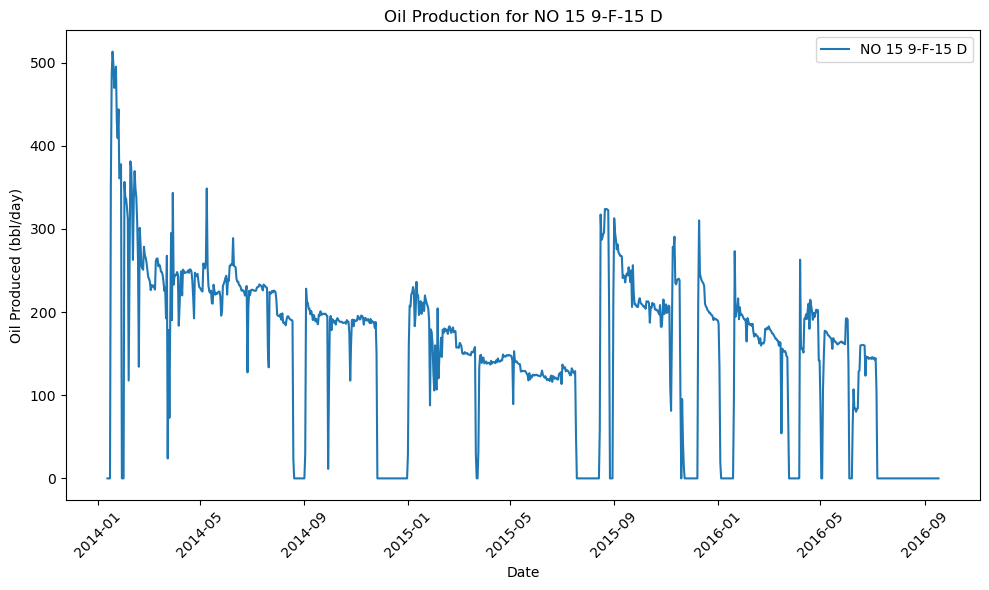

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Volve all data.xlsx'
xls = pd.ExcelFile(file_path)

# Function to plot data for each sheet
def plot_sheet_data(sheet_name):
    # Load the sheet data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Rename columns to have consistent names
    df.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)
    
    # Ensure the date column is in datetime format
    df['ds'] = pd.to_datetime(df['ds'])
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label=sheet_name)
    plt.xlabel('Date')
    plt.ylabel('Oil Produced (bbl/day)')
    plt.title(f'Oil Production for {sheet_name}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Loop through each sheet and plot the data
for sheet in xls.sheet_names:
    plot_sheet_data(sheet)
